<a href="https://colab.research.google.com/github/normienishant/Crop-Yield-Prediction/blob/main/Crop_Yield_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install dask[complete]

In [ ]:
import warnings
warnings.filterwarnings('ignore')
'ignore'

'ignore'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Smart Agricultural Yield Prediction

In [ ]:
import dask.dataframe as dd
df = dd.read_csv('crop_yield_train.csv')

In [ ]:
df.head(5)

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Jharkhand,RAMGARH,Potato,2013,Winter,1361.0,7544.0,5.54
1,Jammu and Kashmir,REASI,Moong(Green Gram),2015,Kharif,13.0,9.0,0.70
2,Haryana,GURGAON,Sweet potato,2009,Whole Year,39.0,800.0,20.51
3,Uttar Pradesh,JALAUN,Sannhamp,2010,Kharif,9.0,3.0,0.33
4,Tamil Nadu,MADURAI,Sugarcane,2006,Whole Year,6006.0,656204.0,109.26


In [ ]:
n_rows = df.shape[0].compute()
n_cols = df.shape[1]

print(f"Shape: ({n_rows}, {n_cols})")

Shape: (276268, 8)


In [ ]:
desc_stats = df.describe().compute()
print("Descriptive Statistics:\n", desc_stats)

Descriptive Statistics:
            Crop_Year         Area     Production          Yield
count  276268.000000  2.762680e+05  2.723010e+05  276268.000000
mean     2008.885875  1.167423e+04  9.689572e+05      79.505841
std         6.563483  4.606174e+04  2.178944e+07     914.262856
min      1997.000000  4.000000e-03  0.000000e+00       0.000000
25%      2003.000000  7.400000e+01  8.700000e+01       0.550000
50%      2009.000000  5.310000e+02  7.140000e+02       1.000000
75%      2015.000000  4.106000e+03  7.190000e+03       2.470000
max      2020.000000  8.580100e+06  1.597800e+09   38800.000000


In [ ]:
missing_values = df.isnull().sum().compute()
print("Missing Values per Column:\n", missing_values)

Missing Values per Column:
 State            0
District         0
Crop             6
Crop_Year        0
Season           0
Area             0
Production    3967
Yield            0
dtype: int64


In [ ]:
crop_counts = df['Crop'].value_counts().compute().sort_values(ascending=False)
print("Crop Value Counts:\n", crop_counts)

Crop Value Counts:
 Crop
Rice                     17180
Maize                    16432
Moong(Green Gram)        12126
Urad                     11618
Sesamum                  10436
Groundnut                10077
Wheat                     9030
Sugarcane                 8839
Rapeseed &Mustard         8835
Arhar/Tur                 8747
Potato                    8555
Onion                     8504
Gram                      8420
Jowar                     7837
Dry chillies              7233
Bajra                     6502
Sunflower                 5854
Peas & beans (Pulses)     5828
Small millets             5583
Cotton(lint)              5129
Masoor                    5061
Ragi                      4695
Barley                    4687
Linseed                   4683
Sweet potato              4623
Other Kharif pulses       4576
Turmeric                  4458
Horse-gram                4388
Garlic                    4253
Coriander                 4053
Soyabean                  3957
Other  Rabi pu

In [ ]:
season_counts = df['Season'].value_counts().compute()
print("Season Value Counts:\n", season_counts)

Season Value Counts:
 Season
Autumn           5594
Kharif         110638
Rabi            80749
Summer          17644
Whole Year      55070
Winter           6573
Name: count, dtype: int64[pyarrow]


In [ ]:
crop_year_counts = df['Crop_Year'].value_counts().compute().sort_values(ascending=False)
print("Year Value Counts:\n", crop_year_counts)

Year Value Counts:
 Crop_Year
2019    15456
2018    14638
2017    14428
2016    13838
2015    13048
2011    12942
2013    12930
2014    12375
2009    12317
2012    12251
2008    12176
2010    11923
2007    11784
2003    11694
2006    11689
2002    11357
2005    11329
2004    11272
2000    10836
2001    10597
1999    10467
1998     9835
1997     6835
2020      251
Name: count, dtype: int64


# Data Cleaning

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df['Production'] = df['Production'].fillna(df['Yield'] * df['Area'])

In [ ]:
df = df.dropna()

In [ ]:
missing_values = df.isnull().sum().compute()
print("Missing Values per Column:\n", missing_values)

Missing Values per Column:
 State         0
District      0
Crop          0
Crop_Year     0
Season        0
Area          0
Production    0
Yield         0
dtype: int64


In [ ]:
df.head(3)

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Jharkhand,RAMGARH,Potato,2013,Winter,1361.0,7544.0,5.54
1,Jammu and Kashmir,REASI,Moong(Green Gram),2015,Kharif,13.0,9.0,0.70
2,Haryana,GURGAON,Sweet potato,2009,Whole Year,39.0,800.0,20.51


# EDA

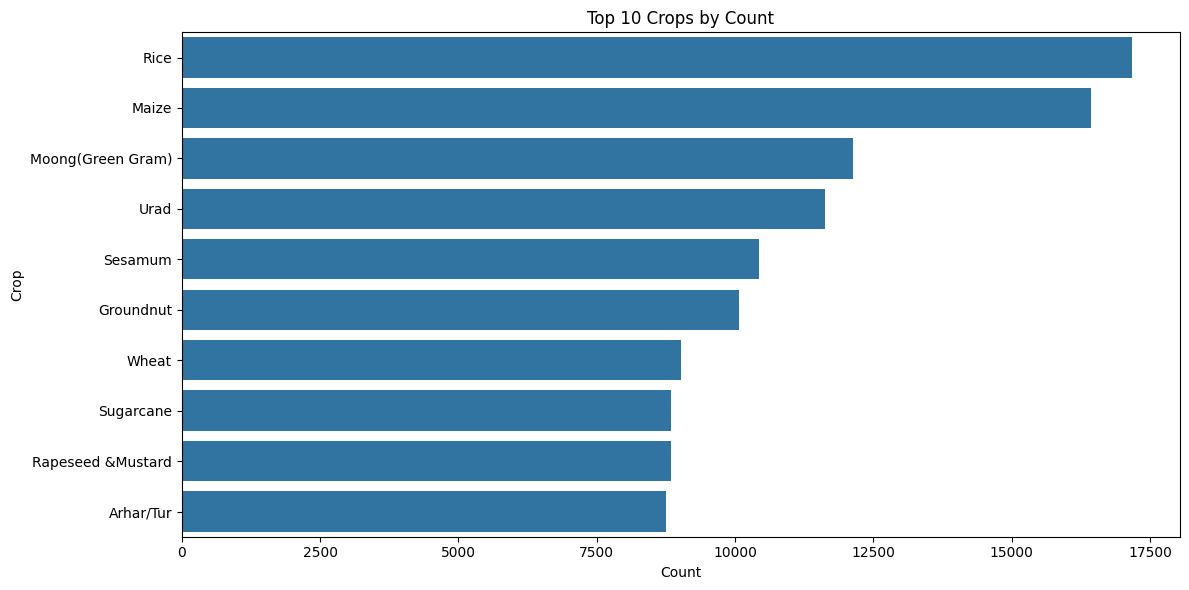

In [ ]:
top_10_crops = df['Crop'].value_counts().nlargest(10).compute().index

df_top_crops = df[df['Crop'].isin(top_10_crops)].compute()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_crops, y='Crop', order=top_10_crops)
plt.title("Top 10 Crops by Count")
plt.xlabel("Count")
plt.ylabel("Crop")
plt.tight_layout()
plt.show()


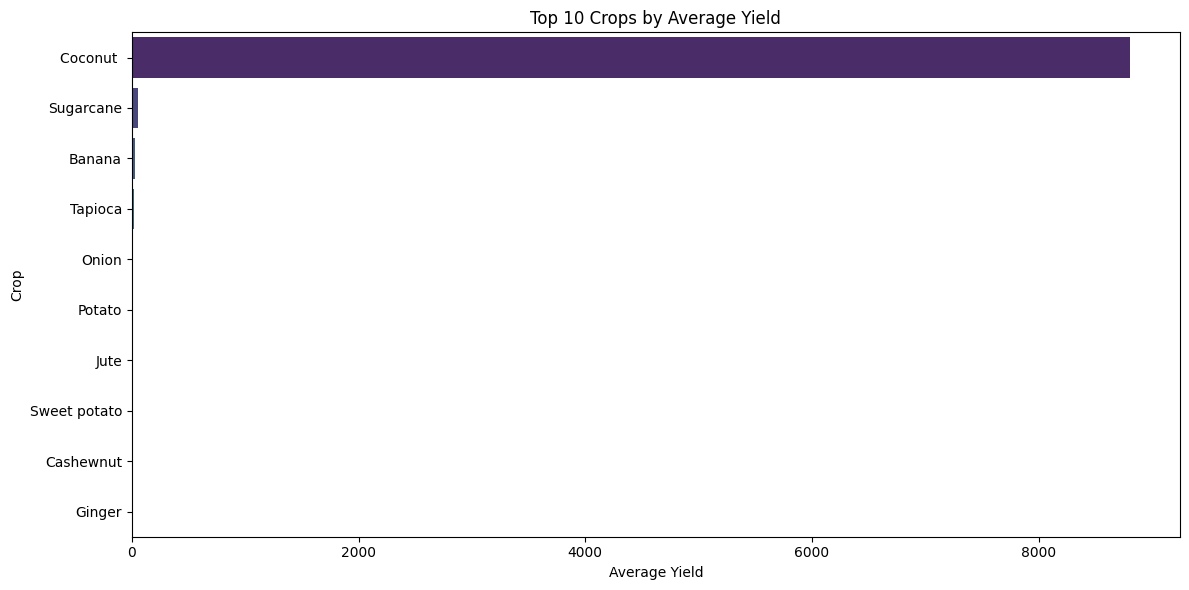

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_crops = df.groupby('Crop')['Yield'].mean().compute().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_crops.values, y=top_crops.index, palette='viridis')
plt.title('Top 10 Crops by Average Yield')
plt.xlabel('Average Yield')
plt.ylabel('Crop')
plt.tight_layout()
plt.show()


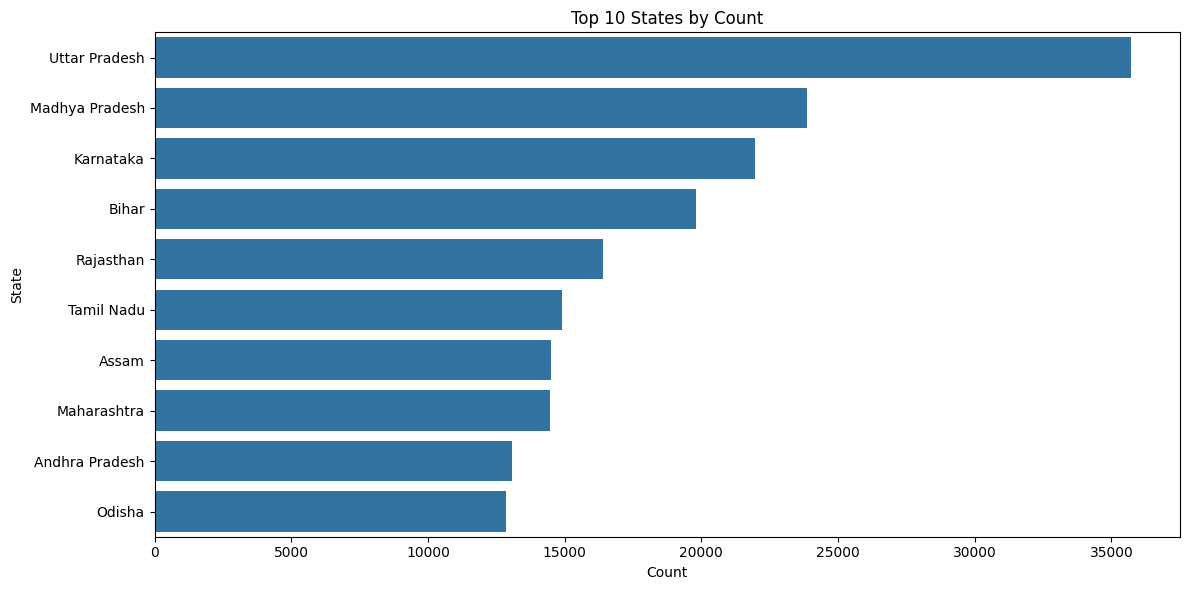

In [ ]:
top_10_states = df['State'].value_counts().nlargest(10).compute().index

df_top_states = df[df['State'].isin(top_10_states)].compute()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_states, y='State', order=top_10_states)
plt.title("Top 10 States by Count")
plt.xlabel("Count")
plt.ylabel("State")
plt.tight_layout()
plt.show()


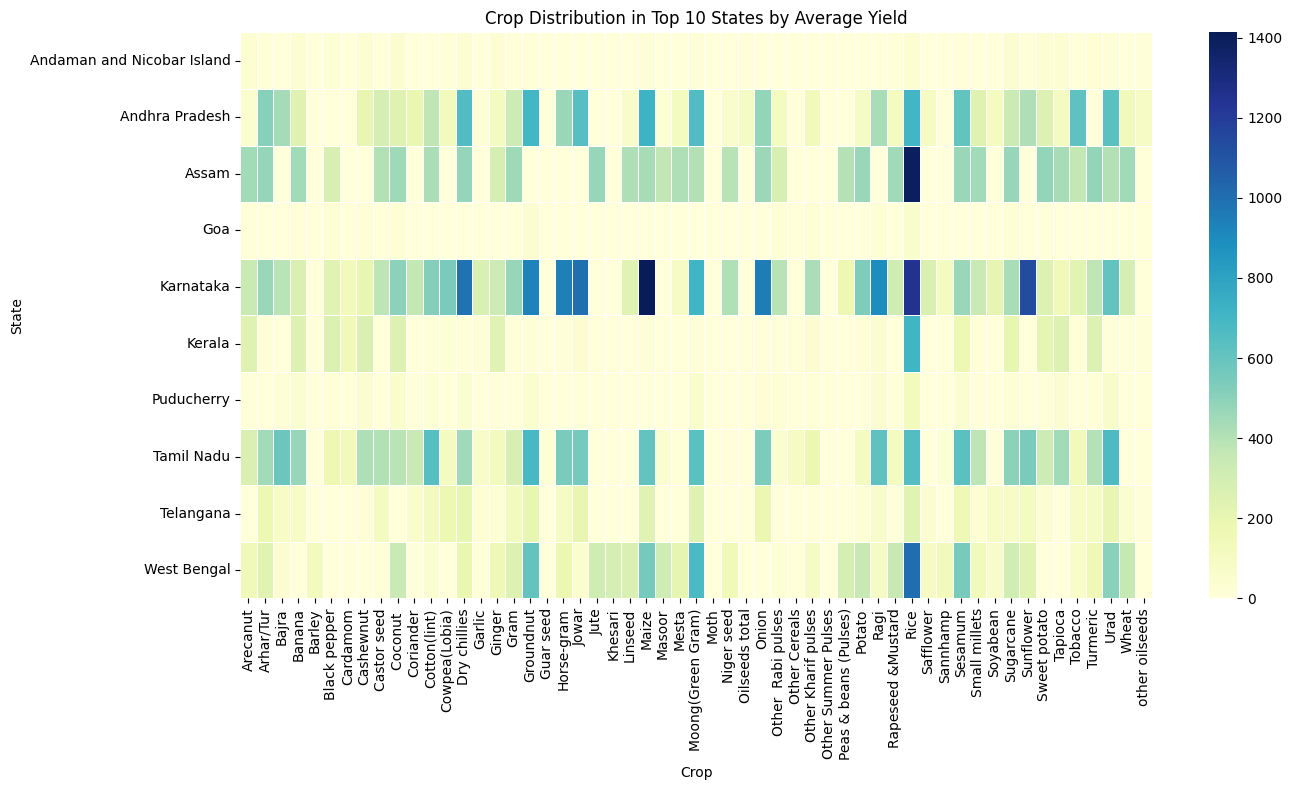

In [ ]:
top_states_avg_yield = df.groupby('State')['Yield'].mean().compute().nlargest(10).index

filtered_df = df[df['State'].isin(top_states_avg_yield)].compute()

pivot = filtered_df.pivot_table(index='State', columns='Crop', aggfunc='size', fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot, cmap="YlGnBu", fmt='d', linewidths=0.5)
plt.title("Crop Distribution in Top 10 States by Average Yield")
plt.xlabel("Crop")
plt.ylabel("State")
plt.tight_layout()
plt.show()


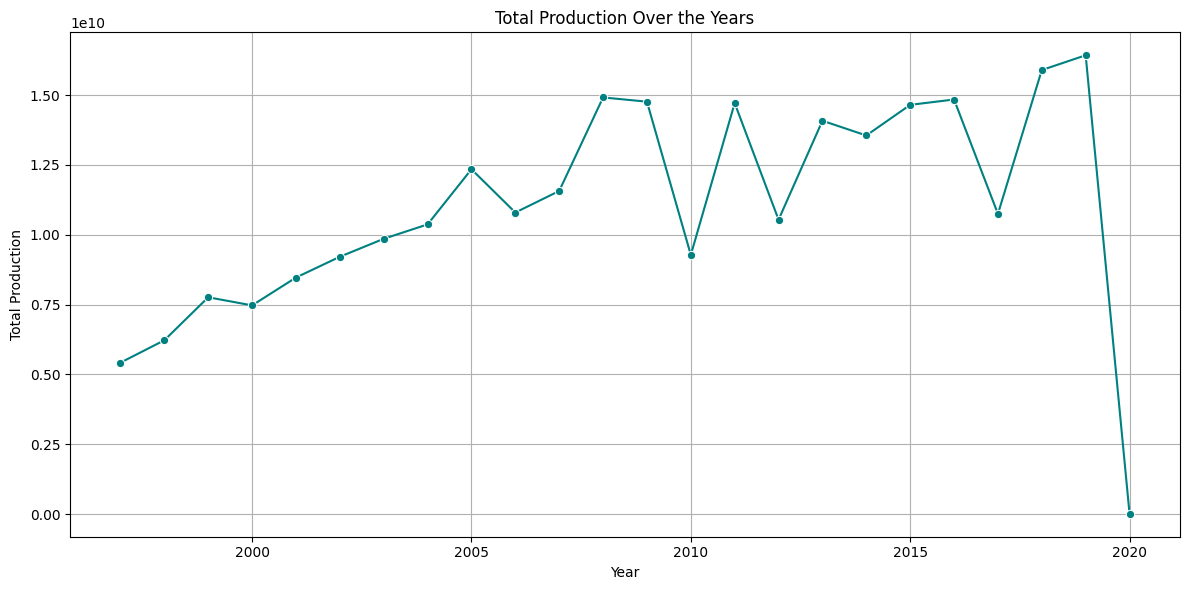

In [ ]:
yearly = df.groupby('Crop_Year')['Production'].sum().compute()

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly.index, y=yearly.values, marker='o', color='teal')
plt.title('Total Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.grid(True)
plt.tight_layout()
plt.show()


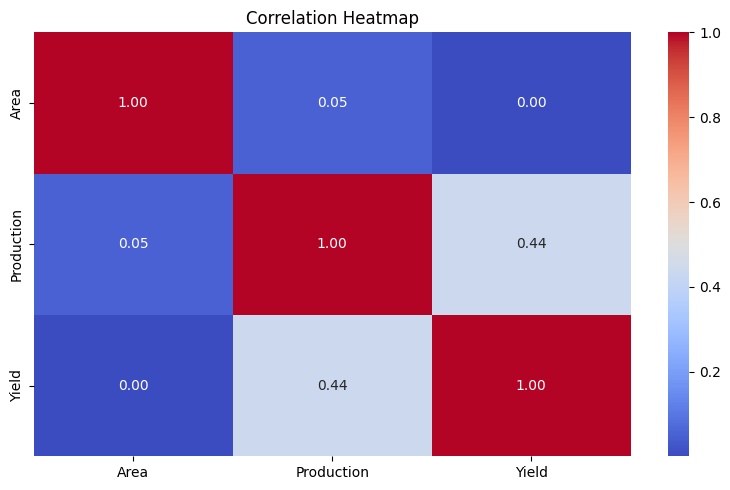

In [ ]:
corr_df = df[['Area', 'Production', 'Yield']].compute()

plt.figure(figsize=(8, 5))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


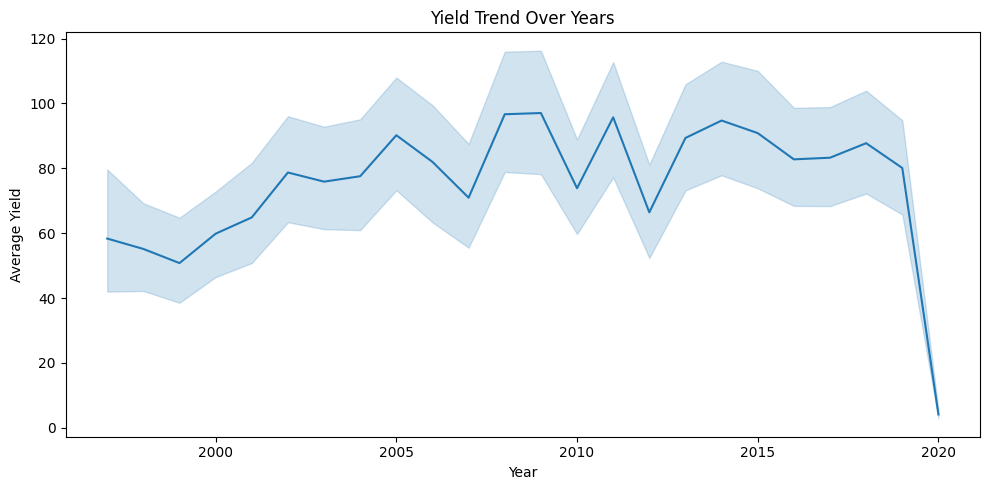

In [ ]:
trend_df = df[['Crop_Year', 'Yield']].compute()

trend_df = trend_df.sort_values("Crop_Year")

plt.figure(figsize=(10, 5))
sns.lineplot(data=trend_df, x='Crop_Year', y='Yield')
plt.title("Yield Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Average Yield")
plt.tight_layout()
plt.show()


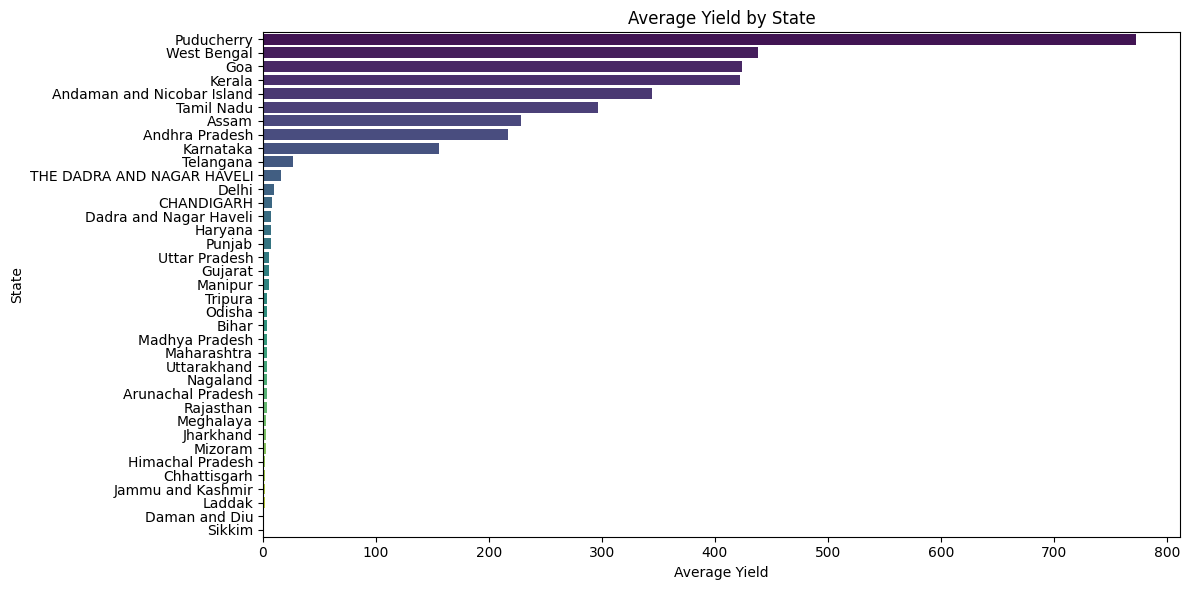

In [ ]:
state_yield = df.groupby('State')['Yield'].mean().compute().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=state_yield.values, y=state_yield.index, palette="viridis")
plt.title("Average Yield by State")
plt.xlabel("Average Yield")
plt.ylabel("State")
plt.tight_layout()
plt.show()


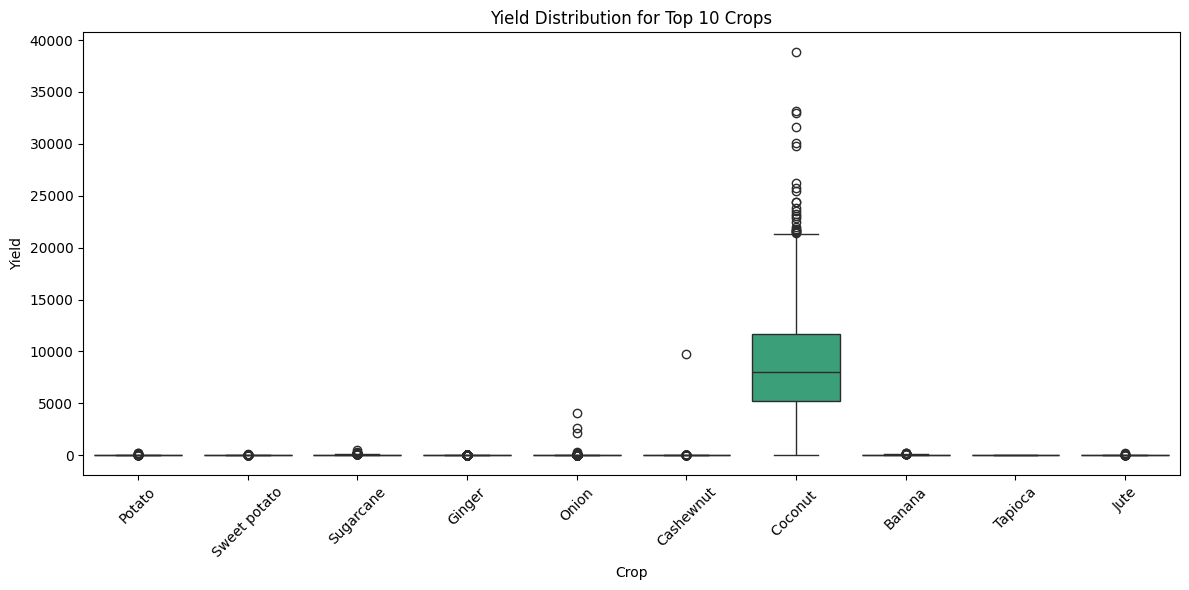

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_yield_crops = df.groupby('Crop')['Yield'].mean().compute().sort_values(ascending=False).head(10).index

filtered_df = df[df['Crop'].isin(top_yield_crops)]

df_pd = filtered_df.compute()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_pd, x="Crop", y="Yield", palette="viridis")
plt.xticks(rotation=45)
plt.title("Yield Distribution for Top 10 Crops")
plt.tight_layout()
plt.show()


# Data Preprocessing

In [ ]:
label_cols = ['State', 'District', 'Crop', 'Season']
encoders = {}

def encode_categorical(df):
    for col in label_cols:
        if col in df.columns:
            df[col] = df[col].astype('str')

            encoder = LabelEncoder()
            df[col] = encoder.fit_transform(df[col])
            encoders[col] = encoder
    return df

df = df.map_partitions(encode_categorical)

df.head()

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,15,532,37,2013,5,1361.0,7544.0,5.54
1,14,540,27,2015,1,13.0,9.0,0.70
2,12,231,48,2009,4,39.0,800.0,20.51
3,34,264,42,2010,1,9.0,3.0,0.33
4,31,391,46,2006,4,6006.0,656204.0,109.26


# Train Test Split

In [ ]:
x = df.drop(columns=['Yield'])
y = df['Yield']

In [ ]:
x = x.compute()
y = y.compute()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 141.26
R² Score: 0.98


In [ ]:
from sklearn.metrics import roc_auc_score
threshold = df['Yield'].mean().compute()
y_train_binary = (y_train > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

y_pred_prob = model.predict(X_test)

auc_score = roc_auc_score(y_test_binary, y_pred_prob)
print(f"AUC ROC Score: {auc_score}")

AUC ROC Score: 0.9999005252389332


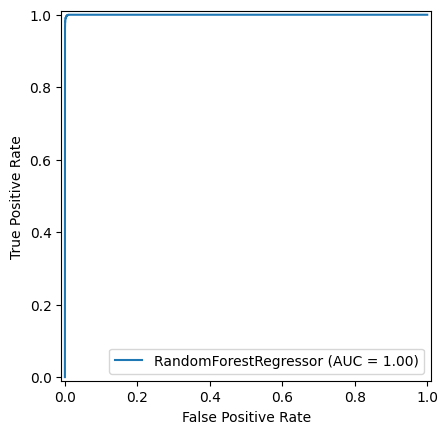

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

y_pred_prob = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_prob)
roc_auc = auc(fpr, tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='RandomForestRegressor')
display.plot()
plt.show()

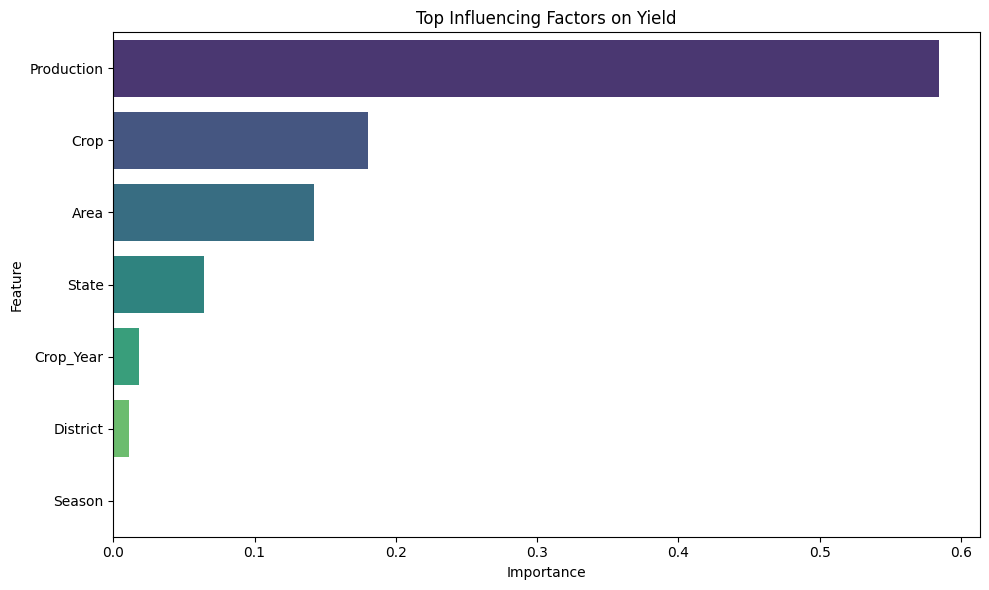

      Feature  Importance
6  Production    0.584339
2        Crop    0.179985
5        Area    0.142311
0       State    0.064090
3   Crop_Year    0.018098
1    District    0.011150
4      Season    0.000027


In [ ]:
importances = model.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top Influencing Factors on Yield')
plt.tight_layout()
plt.show()

print(feature_importance_df.head(10))

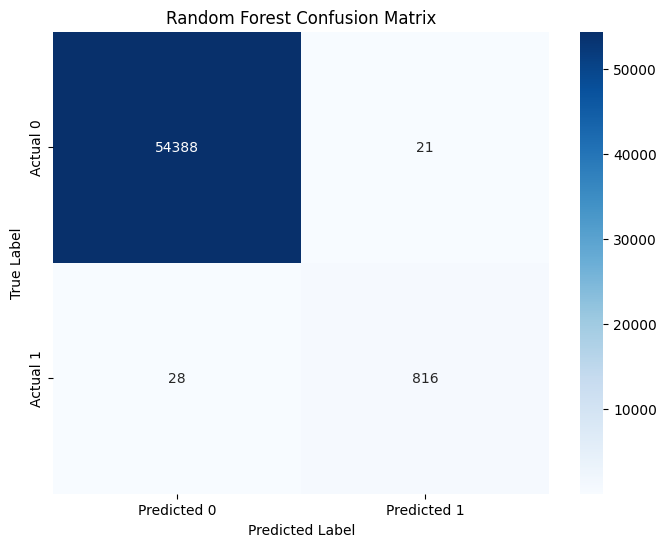

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_binary = (y_pred > threshold).astype(int)
cm = confusion_matrix(y_test_binary, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test_binary, y_pred_binary)
print(f"F1 Score: {f1}")

F1 Score: 0.9708506841165973


In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

XGBoost RMSE: 210.55
XGBoost R² Score: 0.95
XGBoost AUC ROC Score: 0.9902948303001515


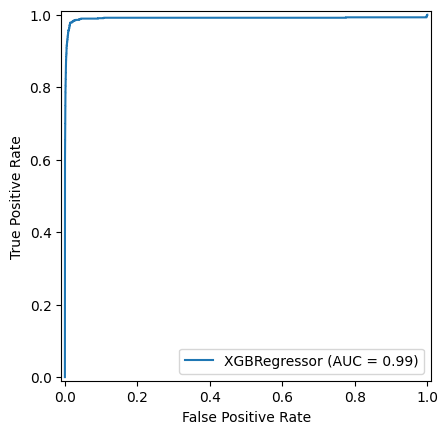

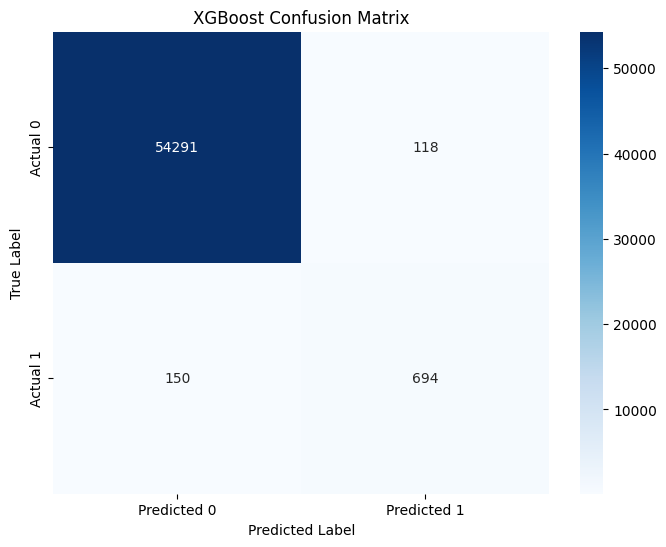

XGBoost F1 Score: 0.8381642512077294


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
y_pred_xgb = xgb.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost R² Score: {r2_xgb:.2f}")

auc_score_xgb = roc_auc_score(y_test_binary, y_pred_xgb)
print(f"XGBoost AUC ROC Score: {auc_score_xgb}")

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test_binary, y_pred_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

display_xgb = RocCurveDisplay(fpr=fpr_xgb, tpr=tpr_xgb, roc_auc=roc_auc_xgb, estimator_name='XGBRegressor')
display_xgb.plot()
plt.show()

y_pred_xgb_binary = (y_pred_xgb > threshold).astype(int)
cm_xgb = confusion_matrix(y_test_binary, y_pred_xgb_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

f1_xgb = f1_score(y_test_binary, y_pred_xgb_binary)
print(f"XGBoost F1 Score: {f1_xgb}")
